In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../data/raw/water_potability.csv")

In [3]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [4]:
df.shape

(3276, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ph,2785.0,7.080795,1.594320,0.000000,6.093092,7.036752,8.062066,14.000000
Hardness,3276.0,196.369496,32.879761,47.432000,176.850538,196.967627,216.667456,323.124000
Solids,3276.0,22014.092526,8768.570828,320.942611,15666.690297,20927.833607,27332.762127,61227.196008
Chloramines,3276.0,7.122277,1.583085,0.352000,6.127421,7.130299,8.114887,13.127000
Sulfate,2495.0,333.775777,41.416840,129.000000,307.699498,333.073546,359.950170,481.030642
Conductivity,3276.0,426.205111,80.824064,181.483754,365.734414,421.884968,481.792304,753.342620
Organic_carbon,3276.0,14.284970,3.308162,2.200000,12.065801,14.218338,16.557652,28.300000
Trihalomethanes,3114.0,66.396293,16.175008,0.738000,55.844536,66.622485,77.337473,124.000000
Turbidity,3276.0,3.966786,0.780382,1.450000,3.439711,3.955028,4.500320,6.739000
Potability,3276.0,0.390110,0.487849,0.000000,0.000000,0.000000,1.000000,1.000000


In [7]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [22]:
df['Potability'].value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

In [10]:
Potability_df = pd.DataFrame(df.groupby('Potability')['Potability'].count())

p_0 = np.round((df.groupby('Potability')['Potability'].count()[0]/ df.shape[0]) * 100,2)
p_1 = np.round((df.groupby('Potability')['Potability'].count()[1]/ df.shape[0]) * 100,2)

Potability_df.insert(loc = 0, column = "%Distribution", value = [p_0,p_1])
Potability_df


,%Distribution,Potability
Potability,,
0,60.99,1998
1,39.01,1278


In [16]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


### Visualization Chart for the features

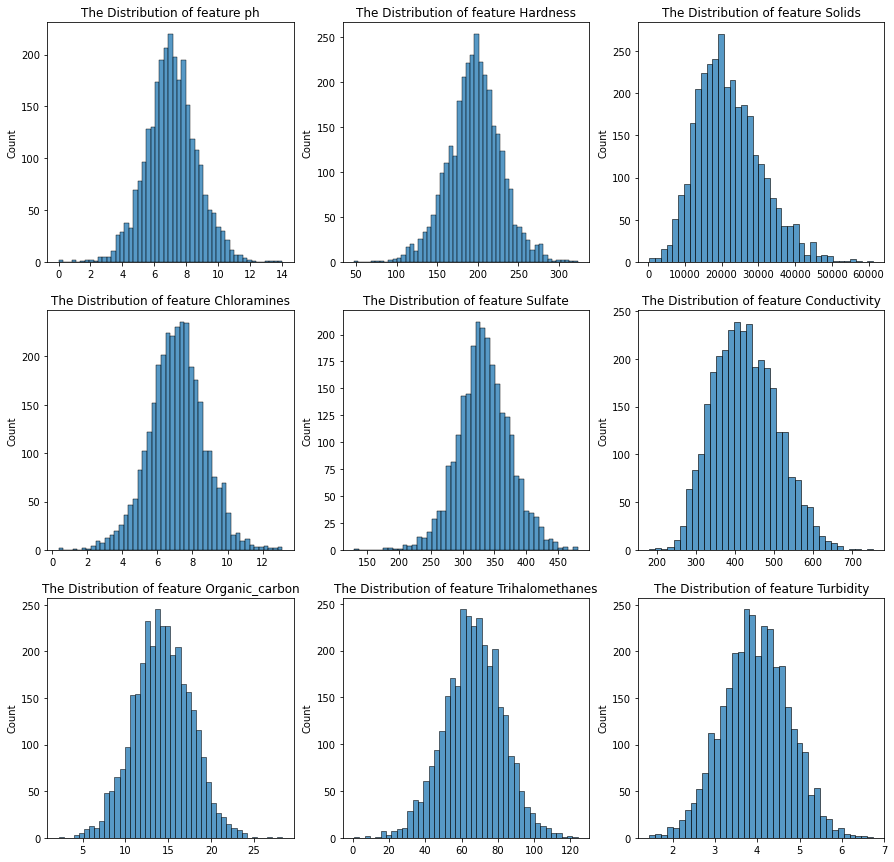

In [73]:
f, ax = plt.subplots(3,3, figsize = (15,15))
k = 0

for i in range(0,3):
    for j in range(0,3):
        sns.histplot(data = df.iloc[:,k], ax = ax[i,j])
        ax[i,j].set_title(f"The Distribution of feature {df.columns[k]}")
        ax[i,j].set(xlabel=None)
        k += 1
plt.show()

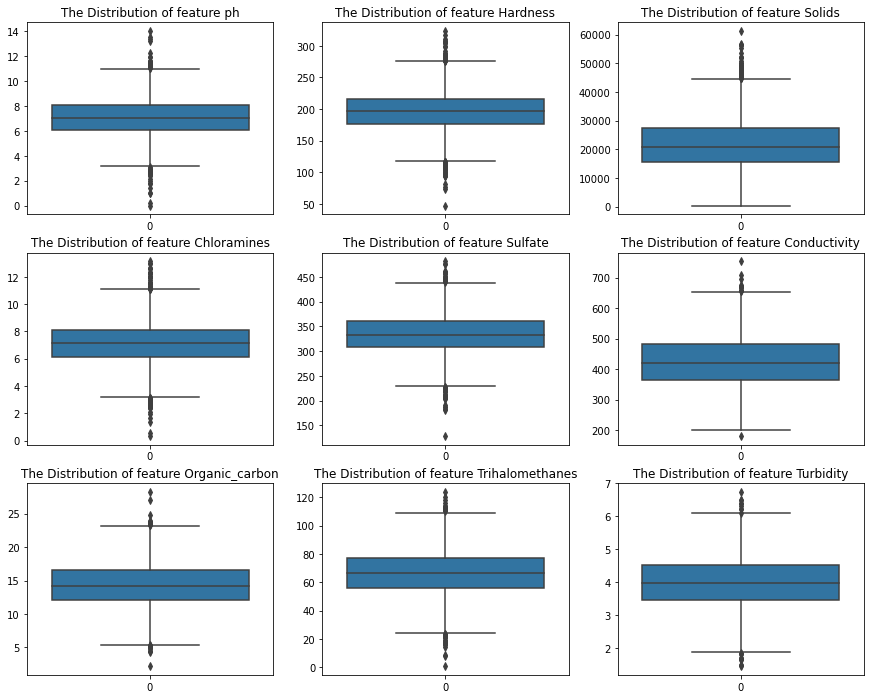

In [74]:
f, ax = plt.subplots(3,3, figsize = (15,12))
k = 0

for i in range(0,3):
    for j in range(0,3):
        sns.boxplot(data = df.iloc[:,k], ax = ax[i,j])
        ax[i,j].set_title(f"The Distribution of feature {df.columns[k]}")
        k += 1
plt.show()

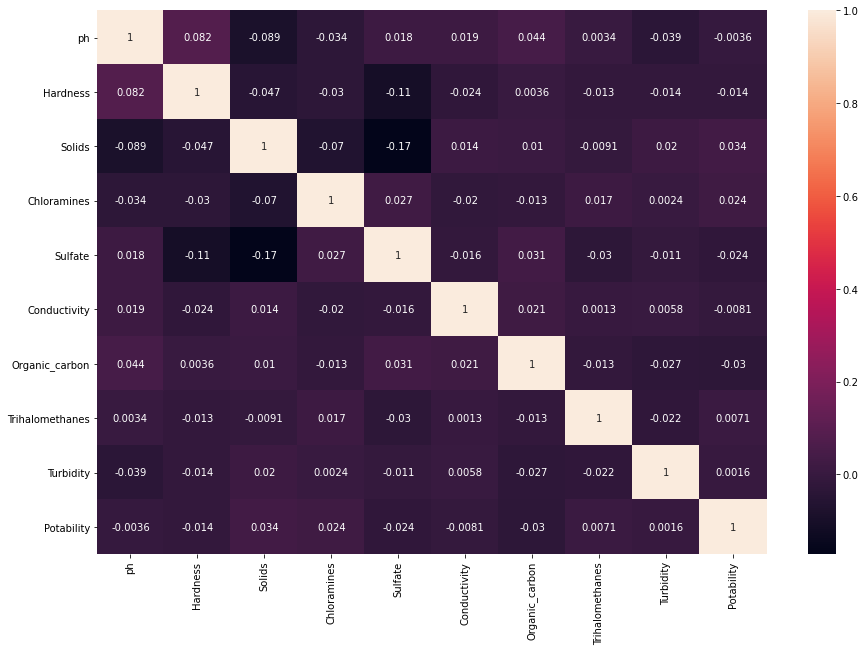

In [68]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [75]:
import scipy.stats as stat
import pylab

def plotData(data,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    data[feature].hist()
    
    plt.subplot(1,2,2)
    stat.probplot(data[feature],dist='norm',plot=pylab)
    plt.show()

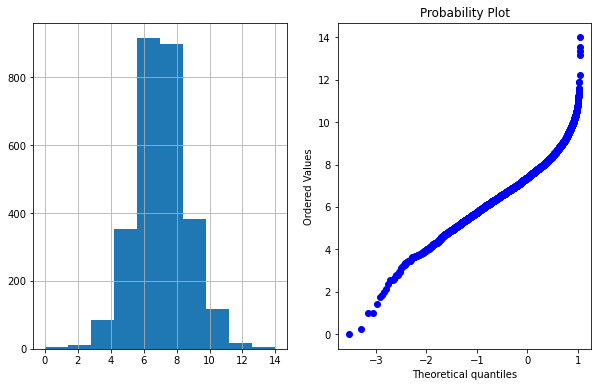

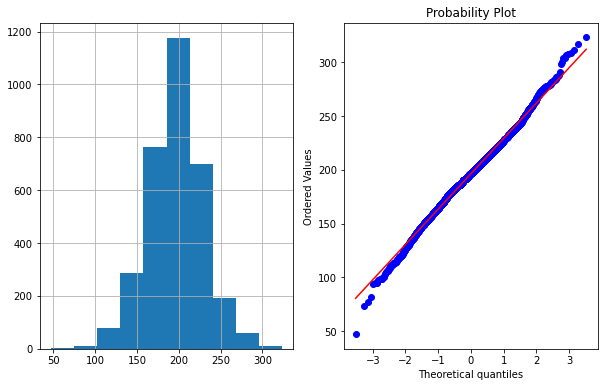

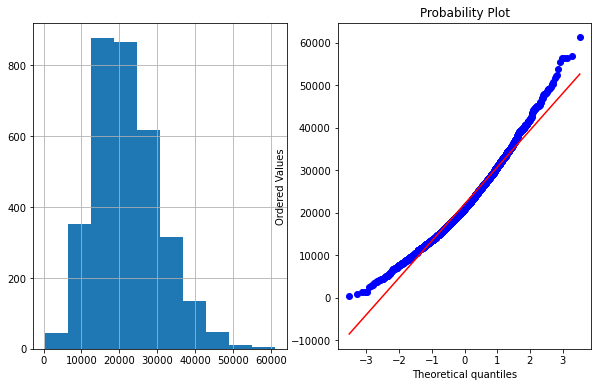

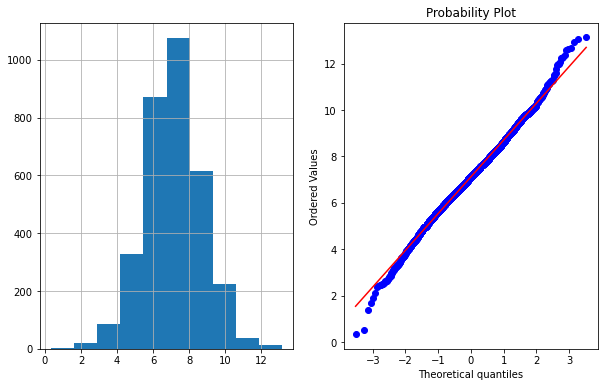

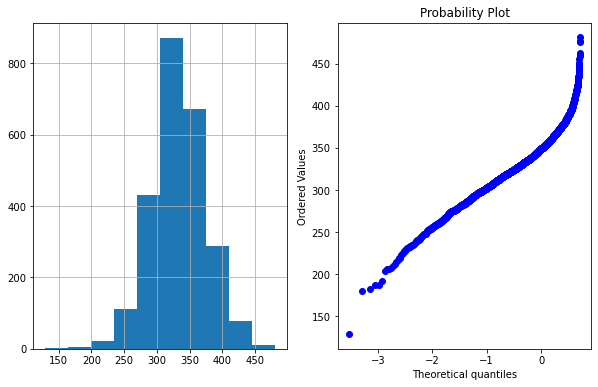

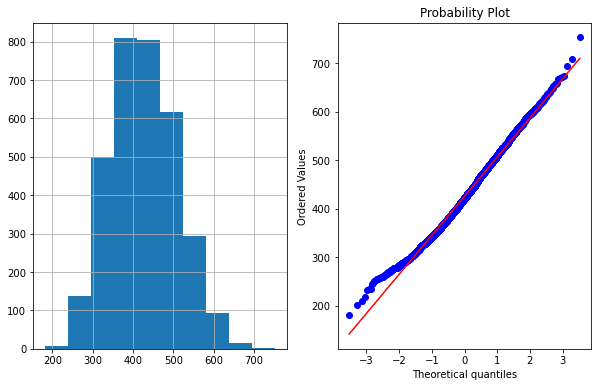

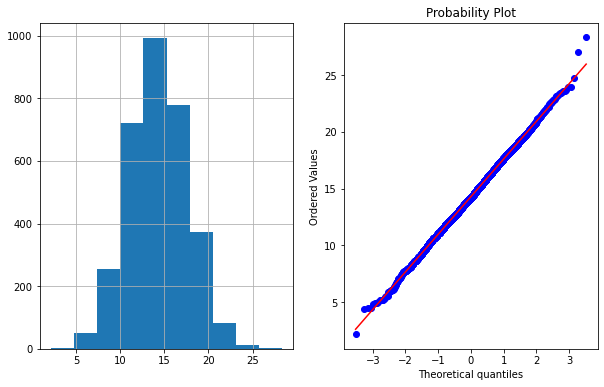

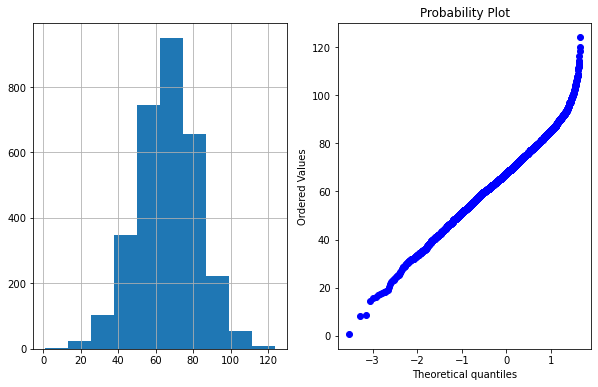

In [78]:
for i in range(0,8):
    plotData(df, df.columns[i])